PROJECT 2 - TITAN INSURANCE COMPANY
Questions

1.)Find the mean of old scheme and new scheme column. (5 points)

2.) Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

3.) What conclusion does the test (p-value) lead to? (2.5 points)

4.) Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is: 
    
    a) The probability of a type 1 error? (2.5 points)

    b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

    c) Power of the test (5 points)

In [19]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import scipy.stats as stats
from math import sqrt
Titan_df = pd.read_csv("InsuranceCompanyData.csv")
Titan_df.set_index("SALESPERSON").head(5)

FileNotFoundError: [Errno 2] File b'InsuranceCompanyData.csv' does not exist: b'InsuranceCompanyData.csv'

In [87]:
# observe the data set
Titan_df[["Old_Scheme","New_Scheme"]].describe()

,Old_Scheme,New_Scheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


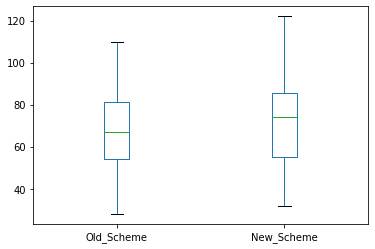

In [88]:
# observe the data set - using box plot
from matplotlib import pyplot
%matplotlib inline
Titan_df[["Old_Scheme","New_Scheme"]].plot(kind="Box")

1.) Find the mean of old scheme and new scheme column.

In [47]:
#Mean of the Old_scheme 
Titan_df.Old_Scheme.mean()

68.03333333333333

In [48]:
#Mean of the New_Scheme
Titan_df.New_Scheme.mean()

72.03333333333333

2.) Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs?

In [49]:
## normality test
## p <= alpha: reject H0, not normal.
## p > alpha: fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(Titan_df.Old_Scheme)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.989, p=0.981


In [50]:
from scipy.stats import shapiro
stat, p = shapiro(Titan_df.New_Scheme)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.969, p=0.506


In [51]:
Scheme_diff = Titan_df.New_Scheme - Titan_df.Old_Scheme

In [52]:
Titan_df.diff=Titan_df.New_Scheme-Titan_df.Old_Scheme
stat,p=shapiro(Titan_df.diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.940, p=0.089


from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
stats.ttest_rel(Titan_df.New_Scheme, Titan_df.Old_Scheme)
stats.ttest_1samp(Scheme_diff, 0)

3.) What conclusion does the test (p-value) lead to? 

In [59]:
#The Pvalue is 0.13
print("Pvalue 0.13 > alpha (0.05), which means one cannot reject Null Hypothesis. So new scheme has not significantly raised outputs")

Pvalue 0.13 > alpha (0.05), which means one cannot reject Null Hypothesis. So new scheme has not significantly raised outputs


The above Paired T test or 1 sample test value comes to be 0.13 which is > 0.05 hence the Null Hypothesis which is there is no significant difference between the mean of the old v/s new Scheme is true

4.) Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:

In [94]:
#Null Hypothesis : Current avg output is sufficient
#Alternate Hypothesis : Current avg output needs to increase by 5000GBP
#Use 1 sample ttest with an increase of mean by 5 in old scheme
import scipy.stats
diff_1s_ttest_pValue = scipy.stats.ttest_1samp(Titan_df["Old_Scheme"],Titan_df["Old_Scheme"].mean()+5)
diff_1s_ttest_pValue

Ttest_1sampResult(statistic=-1.338783455563436, pvalue=0.1910421709623265)

a) The probability of a type 1 error?

In [89]:
print("The probability of a type 1 error using ttest is 19.1%")

The probability of a type 1 error using ttest is 19.1%


b) What is the p- value of the hypothesis test if we test for a difference of $5000? 

In [7]:
# Get the difference between Old and new scheme
Titan_df["Scheme_diff"] = Titan_df["New_Scheme"] - Titan_df["Old_Scheme"]
Titan_df

NameError: name 'Titan_df' is not defined

In [99]:
#Use 1 sample ttest with mean of 5
import scipy.stats
diff_1s_ttest_pValue = scipy.stats.ttest_1samp(Titan_df.Scheme_diff, 5)
diff_1s_ttest_pValue

Ttest_1sampResult(statistic=-0.3889785955886094, pvalue=0.7001334912613286)

In [101]:
# Perform 1 sample ttest with mean of 5 
## Null Hypothesis : avg mean difference is below 5000
## Alternate Hypothesis : avg mean is increase by 5000( >= 5000)
stat, p = scipy.stats.ttest_1samp(Titan_df["Scheme_diff"], 5)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-0.389, p=0.700


In [81]:
print("Answer: Pvalue is 0.70 for difference of 5K")

Answer: Pvalue is 0.70 for difference of 5K


c) Power of the test

In [109]:
#t = (xbar-mu)/(sd/math.sqrt(30))
#t values corresponding to alpha = 0.05 is -1.6991
xbar = 50 + ((Titan_df["New_Scheme"].std() * (-1.6991))/sqrt(30))
xbar

42.53556117164585

In [114]:
B = (xbar - 40)/((Titan_df["New_Scheme"].std()/sqrt(30)))
B

0.5771595274354185

In [115]:
power = 1 - B
power

0.42284047256458146